In [1]:
from functions import *
mplstyle.use(['ggplot', 'fast'])
plt.rcParams.update({
    "text.usetex": True,       
    "font.family": "serif",    
    "font.size": 10, 
})

seed = np.random.seed(2018)

# Hyperparameters from part a and b:
polynomial_degree     = 14
number_of_data_points = 1500
lambda_               = 1e-3
# Hyperparameters from part c, d e and f:*
learning_rate = 0.01
n_iterations  = 2000
tolerance     = 1e-10
use_tol       = True
beta          = 0.9
beta1         = 0.9
beta2         = 0.999
epsilon       = 1e-8
lambda_       = 0.001
out_dir = Path("../Figures")      # fra Code/ til Figures/
out_dir.mkdir(parents=True, exist_ok=True)

In [2]:

#We create the data
train, test, full = make_data(number_of_data_points, seed)

# We start by splitting the data into training and test sets
x_train, x_test, y_train, y_test = train[0], test[0], train[1], test[1]
x_train = x_train.reshape(-1, 1)
x_test  = x_test.reshape(-1, 1)

# Making design matrices based of the scaled and split data
X_train = polynomial_features(x_train, polynomial_degree, intercept=True)
X_test  = polynomial_features(x_test,  polynomial_degree, intercept=True)

In [3]:
methods       = ['gd', 'momentum', 'adagrad', 'rmsprop', 'adam']
results_01       = {}
learning_rate = 0.1
n_epochs      = 300
# mses_ols   = []
# r2s_ols    = []
# mses_ridge = []
# r2s_ridge  = []
# mses_lasso = []
# r2s_lasso  = []
for method in methods:
    theta_OLS, cost_history_OLS     = stochastic_gradient_descent_advanced(X_train, y_train, method=method, lr_method='ols',   learning_rate=learning_rate, tol=tolerance, use_tol=True, beta=beta, beta1=beta1, beta2=beta2, epsilon=epsilon, lambda_=lambda_, n_epochs=n_epochs)
    theta_Ridge, cost_history_Ridge = stochastic_gradient_descent_advanced(X_train, y_train, method=method, lr_method='ridge', learning_rate=learning_rate, tol=tolerance, use_tol=True, beta=beta, beta1=beta1, beta2=beta2, epsilon=epsilon, lambda_=lambda_, n_epochs=n_epochs)
    theta_Lasso, cost_history_Lasso = stochastic_gradient_descent_advanced(X_train, y_train, method=method, lr_method='lasso', learning_rate=learning_rate, tol=tolerance, use_tol=True, beta=beta, beta1=beta1, beta2=beta2, epsilon=epsilon, lambda_=lambda_, n_epochs=n_epochs)
    y_pred_OLS   = X_test @ theta_OLS
    y_pred_Ridge = X_test @ theta_Ridge
    y_pred_Lasso = X_test @ theta_Lasso
    mse_OLS   = MSE(y_test, y_pred_OLS)
    r2_OLS    = R2(y_test, y_pred_OLS)
    mse_Ridge = MSE(y_test, y_pred_Ridge)
    r2_Ridge  = R2(y_test, y_pred_Ridge)
    mse_Lasso = MSE(y_test, y_pred_Lasso)
    r2_Lasso  = R2(y_test, y_pred_Lasso)
    results_01[method] = {
        'theta_OLS'         : theta_OLS,
        'cost_history_OLS'  : cost_history_OLS,
        'mse_OLS'           : mse_OLS,
        'r2_OLS'            : r2_OLS,
        'theta_Ridge'       : theta_Ridge,
        'cost_history_Ridge': cost_history_Ridge,
        'mse_Ridge'         : mse_Ridge,
        'r2_Ridge'          : r2_Ridge,
        'theta_Lasso'       : theta_Lasso,
        'cost_history_Lasso': cost_history_Lasso,
        'mse_Lasso'         : mse_Lasso,
        'r2_Lasso'          : r2_Lasso
    }
    print(f"OLS   : {method}: MSE = {mse_OLS:.6f}, R2 = {r2_OLS:.6f}")
    print(f"Ridge : {method}: MSE = {mse_Ridge:.6f}, R2 = {r2_Ridge:.6f}")
    print(f"Lasso : {method}: MSE = {mse_Lasso:.6f}, R2 = {r2_Lasso:.6f}")
    print()

OLS   : gd: MSE = 0.000080, R2 = 0.735630
Ridge : gd: MSE = 0.000090, R2 = 0.703031
Lasso : gd: MSE = 0.000081, R2 = 0.730814

OLS   : momentum: MSE = 0.000093, R2 = 0.693793
Ridge : momentum: MSE = 0.000111, R2 = 0.631040
Lasso : momentum: MSE = 0.000085, R2 = 0.719809

OLS   : adagrad: MSE = 0.000081, R2 = 0.730513
Ridge : adagrad: MSE = 0.000090, R2 = 0.703033
Lasso : adagrad: MSE = 0.000083, R2 = 0.726552

OLS   : rmsprop: MSE = 0.000082, R2 = 0.728009
Ridge : rmsprop: MSE = 0.000107, R2 = 0.647119
Lasso : rmsprop: MSE = 0.000090, R2 = 0.703121

OLS   : adam: MSE = 0.000065, R2 = 0.784333
Ridge : adam: MSE = 0.000097, R2 = 0.678428
Lasso : adam: MSE = 0.000081, R2 = 0.730393



In [4]:
methods       = ['gd', 'momentum', 'adagrad', 'rmsprop', 'adam']
results_001       = {}
learning_rate = 0.01
n_epochs      = 300
# mses_ols   = []
# r2s_ols    = []
# mses_ridge = []
# r2s_ridge  = []
# mses_lasso = []
# r2s_lasso  = []
for method in methods:
    theta_OLS, cost_history_OLS     = stochastic_gradient_descent_advanced(X_train, y_train, method=method, lr_method='ols',   learning_rate=learning_rate, tol=tolerance, use_tol=True, beta=beta, beta1=beta1, beta2=beta2, epsilon=epsilon, lambda_=lambda_, n_epochs=n_epochs)
    theta_Ridge, cost_history_Ridge = stochastic_gradient_descent_advanced(X_train, y_train, method=method, lr_method='ridge', learning_rate=learning_rate, tol=tolerance, use_tol=True, beta=beta, beta1=beta1, beta2=beta2, epsilon=epsilon, lambda_=lambda_, n_epochs=n_epochs)
    theta_Lasso, cost_history_Lasso = stochastic_gradient_descent_advanced(X_train, y_train, method=method, lr_method='lasso', learning_rate=learning_rate, tol=tolerance, use_tol=True, beta=beta, beta1=beta1, beta2=beta2, epsilon=epsilon, lambda_=lambda_, n_epochs=n_epochs)
    y_pred_OLS   = X_test @ theta_OLS
    y_pred_Ridge = X_test @ theta_Ridge
    y_pred_Lasso = X_test @ theta_Lasso
    mse_OLS   = MSE(y_test, y_pred_OLS)
    r2_OLS    = R2(y_test, y_pred_OLS)
    mse_Ridge = MSE(y_test, y_pred_Ridge)
    r2_Ridge  = R2(y_test, y_pred_Ridge)
    mse_Lasso = MSE(y_test, y_pred_Lasso)
    r2_Lasso  = R2(y_test, y_pred_Lasso)
    results_001[method] = {
        'theta_OLS'         : theta_OLS,
        'cost_history_OLS'  : cost_history_OLS,
        'mse_OLS'           : mse_OLS,
        'r2_OLS'            : r2_OLS,
        'theta_Ridge'       : theta_Ridge,
        'cost_history_Ridge': cost_history_Ridge,
        'mse_Ridge'         : mse_Ridge,
        'r2_Ridge'          : r2_Ridge,
        'theta_Lasso'       : theta_Lasso,
        'cost_history_Lasso': cost_history_Lasso,
        'mse_Lasso'         : mse_Lasso,
        'r2_Lasso'          : r2_Lasso
    }
    print(f"OLS   : {method}: MSE = {mse_OLS:.6f}, R2 = {r2_OLS:.6f}")
    print(f"Ridge : {method}: MSE = {mse_Ridge:.6f}, R2 = {r2_Ridge:.6f}")
    print(f"Lasso : {method}: MSE = {mse_Lasso:.6f}, R2 = {r2_Lasso:.6f}")
    print()

OLS   : gd: MSE = 0.000100, R2 = 0.668342
Ridge : gd: MSE = 0.000104, R2 = 0.655977
Lasso : gd: MSE = 0.000103, R2 = 0.660206

OLS   : momentum: MSE = 0.000078, R2 = 0.741095
Ridge : momentum: MSE = 0.000090, R2 = 0.703513
Lasso : momentum: MSE = 0.000080, R2 = 0.734283

OLS   : adagrad: MSE = 0.000114, R2 = 0.622267
Ridge : adagrad: MSE = 0.000116, R2 = 0.617256
Lasso : adagrad: MSE = 0.000113, R2 = 0.625763

OLS   : rmsprop: MSE = 0.000064, R2 = 0.787816
Ridge : rmsprop: MSE = 0.000093, R2 = 0.691729
Lasso : rmsprop: MSE = 0.000077, R2 = 0.745267

OLS   : adam: MSE = 0.000065, R2 = 0.784701
Ridge : adam: MSE = 0.000092, R2 = 0.695170
Lasso : adam: MSE = 0.000077, R2 = 0.745742



In [5]:
methods       = ['gd', 'momentum', 'adagrad', 'rmsprop', 'adam']
results_0001       = {}
learning_rate = 0.001
n_epochs      = 300
# mses_ols   = []
# r2s_ols    = []
# mses_ridge = []
# r2s_ridge  = []
# mses_lasso = []
# r2s_lasso  = []
for method in methods:
    theta_OLS, cost_history_OLS     = stochastic_gradient_descent_advanced(X_train, y_train, method=method, lr_method='ols',   learning_rate=learning_rate, tol=tolerance, use_tol=True, beta=beta, beta1=beta1, beta2=beta2, epsilon=epsilon, lambda_=lambda_, n_epochs=n_epochs)
    theta_Ridge, cost_history_Ridge = stochastic_gradient_descent_advanced(X_train, y_train, method=method, lr_method='ridge', learning_rate=learning_rate, tol=tolerance, use_tol=True, beta=beta, beta1=beta1, beta2=beta2, epsilon=epsilon, lambda_=lambda_, n_epochs=n_epochs)
    theta_Lasso, cost_history_Lasso = stochastic_gradient_descent_advanced(X_train, y_train, method=method, lr_method='lasso', learning_rate=learning_rate, tol=tolerance, use_tol=True, beta=beta, beta1=beta1, beta2=beta2, epsilon=epsilon, lambda_=lambda_, n_epochs=n_epochs)
    y_pred_OLS   = X_test @ theta_OLS
    y_pred_Ridge = X_test @ theta_Ridge
    y_pred_Lasso = X_test @ theta_Lasso
    mse_OLS   = MSE(y_test, y_pred_OLS)
    r2_OLS    = R2(y_test, y_pred_OLS)
    mse_Ridge = MSE(y_test, y_pred_Ridge)
    r2_Ridge  = R2(y_test, y_pred_Ridge)
    mse_Lasso = MSE(y_test, y_pred_Lasso)
    r2_Lasso  = R2(y_test, y_pred_Lasso)
    results_0001[method] = {
        'theta_OLS'         : theta_OLS,
        'cost_history_OLS'  : cost_history_OLS,
        'mse_OLS'           : mse_OLS,
        'r2_OLS'            : r2_OLS,
        'theta_Ridge'       : theta_Ridge,
        'cost_history_Ridge': cost_history_Ridge,
        'mse_Ridge'         : mse_Ridge,
        'r2_Ridge'          : r2_Ridge,
        'theta_Lasso'       : theta_Lasso,
        'cost_history_Lasso': cost_history_Lasso,
        'mse_Lasso'         : mse_Lasso,
        'r2_Lasso'          : r2_Lasso
    }
    print(f"OLS   : {method}: MSE = {mse_OLS:.6f}, R2 = {r2_OLS:.6f}")
    print(f"Ridge : {method}: MSE = {mse_Ridge:.6f}, R2 = {r2_Ridge:.6f}")
    print(f"Lasso : {method}: MSE = {mse_Lasso:.6f}, R2 = {r2_Lasso:.6f}")
    print()

OLS   : gd: MSE = 0.000144, R2 = 0.522418
Ridge : gd: MSE = 0.000145, R2 = 0.520004
Lasso : gd: MSE = 0.000145, R2 = 0.519459

OLS   : momentum: MSE = 0.000100, R2 = 0.669667
Ridge : momentum: MSE = 0.000104, R2 = 0.656910
Lasso : momentum: MSE = 0.000103, R2 = 0.659608

OLS   : adagrad: MSE = 0.000277, R2 = 0.081782
Ridge : adagrad: MSE = 0.000278, R2 = 0.079368
Lasso : adagrad: MSE = 0.000277, R2 = 0.083562

OLS   : rmsprop: MSE = 0.000084, R2 = 0.722038
Ridge : rmsprop: MSE = 0.000090, R2 = 0.701778
Lasso : rmsprop: MSE = 0.000084, R2 = 0.721750

OLS   : adam: MSE = 0.000084, R2 = 0.723146
Ridge : adam: MSE = 0.000090, R2 = 0.701475
Lasso : adam: MSE = 0.000084, R2 = 0.720979



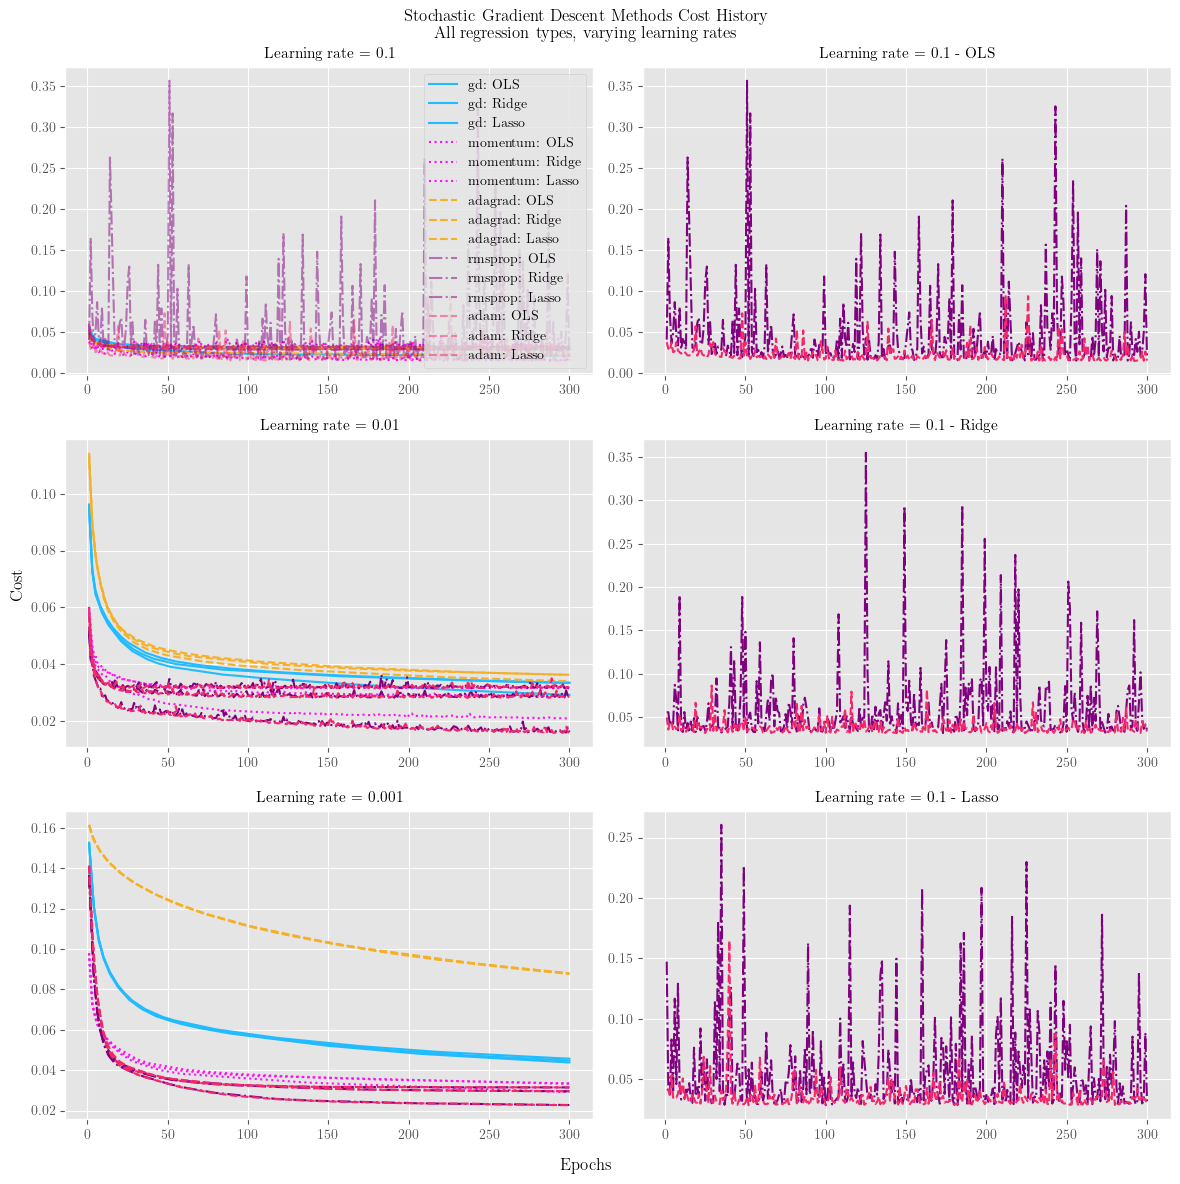

In [6]:
colors_cost_history    = {'gd': '#21BCFF', 'momentum': '#FF10F0', 'adagrad': '#F5B027', 'rmsprop': '#800080', 'adam': '#F5276C'}
linestyle_cost_history = {'gd': '-', 'momentum': ':', 'adagrad': '--', 'rmsprop': '-.', 'adam': '--'}
fig, ax = plt.subplots(3,2, figsize=(12, 12))
i = np.arange(1, n_epochs+1)
for method in methods:
    if method == 'adam' or method == 'rmsprop':
        ax[0,0].plot(i,results_01[method]['cost_history_OLS'], label=f"{method}: OLS", linewidth=1.5, linestyle=linestyle_cost_history[method], alpha=0.5, color=colors_cost_history[method])
        ax[0,0].plot(i,results_001[method]['cost_history_Ridge'], label=f"{method}: Ridge", linewidth=1.5, linestyle=linestyle_cost_history[method], alpha=0.5, color=colors_cost_history[method])
        ax[0,0].plot(i,results_001[method]['cost_history_Lasso'], label=f"{method}: Lasso", linewidth=1.5, linestyle=linestyle_cost_history[method], alpha=0.5, color=colors_cost_history[method])
    else:
        ax[0,0].plot(i,results_01[method]['cost_history_OLS'], label=f"{method}: OLS", linewidth=1.5, linestyle=linestyle_cost_history[method], alpha=1, color=colors_cost_history[method])
        ax[0,0].plot(i,results_01[method]['cost_history_Ridge'], label=f"{method}: Ridge", linewidth=1.5, linestyle=linestyle_cost_history[method], alpha=1, color=colors_cost_history[method])
        ax[0,0].plot(i,results_01[method]['cost_history_Lasso'], label=f"{method}: Lasso", linewidth=1.5, linestyle=linestyle_cost_history[method], alpha=1, color=colors_cost_history[method])

for method in methods:
    ax[1,0].plot(i,results_001[method]['cost_history_OLS'], label=method, linewidth=1.5, linestyle=linestyle_cost_history[method], alpha=1, color=colors_cost_history[method])
    ax[1,0].plot(i,results_001[method]['cost_history_Ridge'], label=method, linewidth=1.5, linestyle=linestyle_cost_history[method], alpha=1, color=colors_cost_history[method])
    ax[1,0].plot(i,results_001[method]['cost_history_Lasso'], label=method, linewidth=1.5, linestyle=linestyle_cost_history[method], alpha=1, color=colors_cost_history[method])
for method in methods:
    ax[2,0].plot(i,results_0001[method]['cost_history_OLS'], label=method, linewidth=1.5, linestyle=linestyle_cost_history[method], alpha=1, color=colors_cost_history[method])
    ax[2,0].plot(i,results_0001[method]['cost_history_Ridge'], label=method, linewidth=1.5, linestyle=linestyle_cost_history[method], alpha=1, color=colors_cost_history[method])
    ax[2,0].plot(i,results_0001[method]['cost_history_Lasso'], label=method, linewidth=1.5, linestyle=linestyle_cost_history[method], alpha=1, color=colors_cost_history[method])

for method in methods[-2:]:
    ax[0,1].plot(i,results_01[method]['cost_history_OLS'], label=method, linewidth=1.5, linestyle=linestyle_cost_history[method], alpha=1, color=colors_cost_history[method])
    ax[1,1].plot(i,results_01[method]['cost_history_Ridge'], label=method, linewidth=1.5, linestyle=linestyle_cost_history[method], alpha=1, color=colors_cost_history[method])
    ax[2,1].plot(i,results_01[method]['cost_history_Lasso'], label=method, linewidth=1.5, linestyle=linestyle_cost_history[method], alpha=1, color=colors_cost_history[method])

fig.suptitle("Stochastic Gradient Descent Methods Cost History\nAll regression types, varying learning rates")
ax[0,0].set_title("Learning rate = 0.1", fontsize = 11)
ax[1,0].set_title("Learning rate = 0.01", fontsize = 11)
ax[2,0].set_title("Learning rate = 0.001", fontsize = 11)
ax[0,1].set_title("Learning rate = 0.1 - OLS", fontsize = 11)
ax[1,1].set_title("Learning rate = 0.1 - Ridge", fontsize = 11)
ax[2,1].set_title("Learning rate = 0.1 - Lasso", fontsize = 11)
ax[0,0].legend()
fig.supxlabel("Epochs")
fig.supylabel("Cost")
plt.tight_layout()
plt.savefig(out_dir / "SGD_dlr.pdf" , dpi=200, bbox_inches="tight")

In [7]:
methods       = ['gd', 'momentum', 'adagrad', 'rmsprop', 'adam']
results       = {}
learning_rate = 0.001
n_epochs      = 1000
# mses_ols   = []
# r2s_ols    = []
# mses_ridge = []
# r2s_ridge  = []
# mses_lasso = []
# r2s_lasso  = []
for method in methods:
    theta_OLS, cost_history_OLS     = stochastic_gradient_descent_advanced(X_train, y_train, method=method, lr_method='ols',   learning_rate=learning_rate, tol=tolerance, use_tol=True, beta=beta, beta1=beta1, beta2=beta2, epsilon=epsilon, lambda_=lambda_, n_epochs=n_epochs)
    theta_Ridge, cost_history_Ridge = stochastic_gradient_descent_advanced(X_train, y_train, method=method, lr_method='ridge', learning_rate=learning_rate, tol=tolerance, use_tol=True, beta=beta, beta1=beta1, beta2=beta2, epsilon=epsilon, lambda_=lambda_, n_epochs=n_epochs)
    theta_Lasso, cost_history_Lasso = stochastic_gradient_descent_advanced(X_train, y_train, method=method, lr_method='lasso', learning_rate=learning_rate, tol=tolerance, use_tol=True, beta=beta, beta1=beta1, beta2=beta2, epsilon=epsilon, lambda_=lambda_, n_epochs=n_epochs)
    y_pred_OLS   = X_test @ theta_OLS
    y_pred_Ridge = X_test @ theta_Ridge
    y_pred_Lasso = X_test @ theta_Lasso
    mse_OLS   = MSE(y_test, y_pred_OLS)
    r2_OLS    = R2(y_test, y_pred_OLS)
    mse_Ridge = MSE(y_test, y_pred_Ridge)
    r2_Ridge  = R2(y_test, y_pred_Ridge)
    mse_Lasso = MSE(y_test, y_pred_Lasso)
    r2_Lasso  = R2(y_test, y_pred_Lasso)
    results[method] = {
        'theta_OLS'         : theta_OLS,
        'cost_history_OLS'  : cost_history_OLS,
        'mse_OLS'           : mse_OLS,
        'r2_OLS'            : r2_OLS,
        'theta_Ridge'       : theta_Ridge,
        'cost_history_Ridge': cost_history_Ridge,
        'mse_Ridge'         : mse_Ridge,
        'r2_Ridge'          : r2_Ridge,
        'theta_Lasso'       : theta_Lasso,
        'cost_history_Lasso': cost_history_Lasso,
        'mse_Lasso'         : mse_Lasso,
        'r2_Lasso'          : r2_Lasso
    }
    print(f"OLS   : {method}: MSE = {mse_OLS:.6f}, R2 = {r2_OLS:.6f}")
    print(f"Ridge : {method}: MSE = {mse_Ridge:.6f}, R2 = {r2_Ridge:.6f}")
    print(f"Lasso : {method}: MSE = {mse_Lasso:.6f}, R2 = {r2_Lasso:.6f}")
    print()

OLS   : gd: MSE = 0.000119, R2 = 0.605644
Ridge : gd: MSE = 0.000120, R2 = 0.602566
Lasso : gd: MSE = 0.000119, R2 = 0.607050

OLS   : momentum: MSE = 0.000084, R2 = 0.722235
Ridge : momentum: MSE = 0.000091, R2 = 0.697350
Lasso : momentum: MSE = 0.000087, R2 = 0.712893

OLS   : adagrad: MSE = 0.000200, R2 = 0.336606
Ridge : adagrad: MSE = 0.000201, R2 = 0.336226
Lasso : adagrad: MSE = 0.000201, R2 = 0.336179

OLS   : rmsprop: MSE = 0.000072, R2 = 0.760177
Ridge : rmsprop: MSE = 0.000090, R2 = 0.703423
Lasso : rmsprop: MSE = 0.000078, R2 = 0.741857

OLS   : adam: MSE = 0.000072, R2 = 0.761314
Ridge : adam: MSE = 0.000090, R2 = 0.701909
Lasso : adam: MSE = 0.000078, R2 = 0.742816



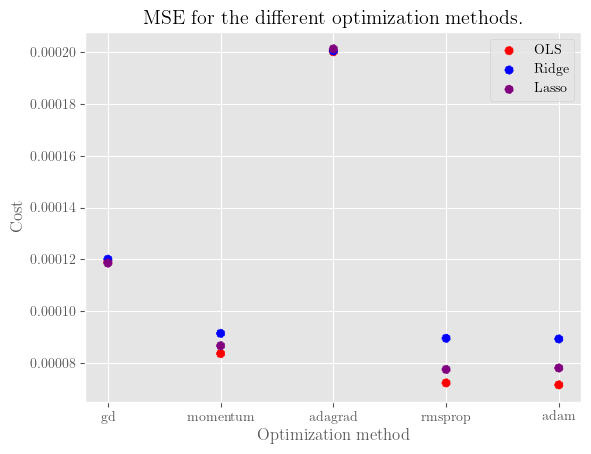

In [35]:
for i, method in enumerate(methods):
    plt.scatter(i, results[method]["mse_OLS"], color = "red", ls = "--")
    plt.scatter(i,results[method]["mse_Ridge"], color = "blue", ls = "--")
    plt.scatter(i, results[method]["mse_Lasso"], color = "purple", ls = "--")

plt.legend(["OLS", "Ridge", "Lasso"])
i = np.arange(0,5)
plt.xticks(i,methods)
plt.ylabel("Cost")
plt.xlabel("Optimization method")
plt.title("MSE for the different optimization methods.")
plt.savefig(out_dir / "MSE_SGD.pdf" , dpi=200, bbox_inches="tight")